In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
def preprocess(img, label):
    return tf.image.resize(img, [200, 200])/255.0, label

In [3]:
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name = 'cats_vs_dogs', split = split, as_supervised = True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteT8FZFM/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


Epoch 1/3
509/509 [==============================] - 955s 2s/step - loss: 0.6304 - accuracy: 0.6664 - val_loss: 0.5591 - val_accuracy: 0.7057
Epoch 2/3
509/509 [==============================] - 931s 2s/step - loss: 0.4713 - accuracy: 0.7745 - val_loss: 0.4803 - val_accuracy: 0.7677
Epoch 3/3
509/509 [==============================] - 939s 2s/step - loss: 0.3732 - accuracy: 0.8319 - val_loss: 0.4900 - val_accuracy: 0.7692


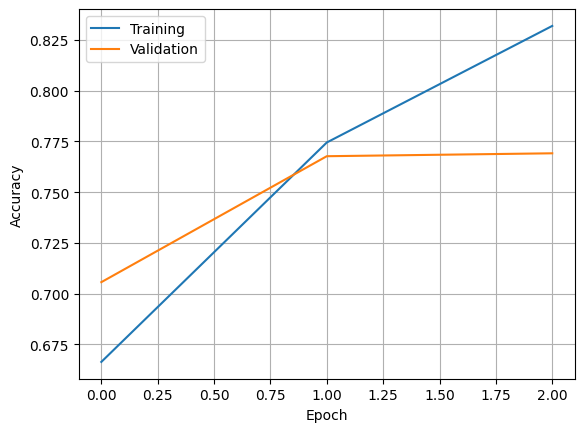

219/219 [==============================] - 95s 435ms/step - loss: 0.4900 - accuracy: 0.7692
0.48998579382896423
0.7691646218299866


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(200, 200, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory = model.fit(trainDataset, epochs = 3, validation_data=testDataset)

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

model.save('model.h5')

8/8 [==============================] - 7s 768ms/step


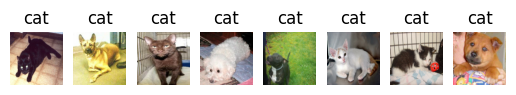

In [5]:
# model = keras.models.load_model('model.h5')
predictions = model.predict(testDataset.take(8))

classNames = ['cat', 'dog']

i = 0
fig, ax = plt.subplots(1,8)
for image, _ in testDataset.take(8):
  predictedLabel = int(predictions[i]) >= 0.8

  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

plt.show()